In [1]:
## colab 환경에서 한글 폰트 설정
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

!apt-get update -qq
!apt-get install fonts-nanum* -qq

path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font_name = fm.FontProperties(fname=path, size=10).get_name()
plt.rc('font', family=font_name)

fm._rebuild()
mpl.rcParams['axes.unicode_minus'] = False


Selecting previously unselected package fonts-nanum-extra.
(Reading database ... 123069 files and directories currently installed.)
Preparing to unpack .../fonts-nanum-extra_20180306-3_all.deb ...
Unpacking fonts-nanum-extra (20180306-3) ...
Selecting previously unselected package fonts-nanum.
Preparing to unpack .../fonts-nanum_20180306-3_all.deb ...
Unpacking fonts-nanum (20180306-3) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-2_all.deb ...
Unpacking fonts-nanum-coding (2.5-2) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-7_all.deb ...
Unpacking fonts-nanum-eco (1.000-7) ...
Setting up fonts-nanum-extra (20180306-3) ...
Setting up fonts-nanum (20180306-3) ...
Setting up fonts-nanum-coding (2.5-2) ...
Setting up fonts-nanum-eco (1.000-7) ...
Processing triggers for fontconfig (2.13.1-2ubuntu3) ...


AttributeError: ignored

In [ ]:
## colab 환경에서 한글 폰트 설정
!apt-get update -qq
!apt-get install fonts-nanum* -qq

In [2]:
## colab 환경에서 konlpy 설정

%%bash
apt-get update
apt-get install g++ openjdk-8-jdk python-dev python3-dev
pip3 install JPype1
pip3 install konlpy

%env JAVA_HOME "/usr/lib/jvm/java-8-openjdk-amd64"

Hit:1 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease
Hit:2 http://archive.ubuntu.com/ubuntu focal InRelease
Hit:3 http://archive.ubuntu.com/ubuntu focal-updates InRelease
Hit:4 http://archive.ubuntu.com/ubuntu focal-backports InRelease
Hit:5 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease
Hit:6 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Hit:7 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal InRelease
Hit:8 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu focal InRelease
Hit:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease
Hit:10 http://ppa.launchpad.net/ubuntugis/ppa/ubuntu focal InRelease
Hit:11 http://security.ubuntu.com/ubuntu focal-security InRelease
Reading package lists...
Reading package lists...
Building dependency tree...
Reading state information...
g++ is already the newest version (4:9.3.0-1ubuntu2).
g++ set to manually installed.
python3-dev is already the newest ver

bash: line 6: fg: no job control


CalledProcessError: ignored

In [ ]:
train_df.info()

In [ ]:
test_df.info()

# 프로젝트(감성 분류 모델 만들기 w/ 리뷰 데이터)

In [2]:
import pandas as pd

train_df = pd.read_csv('../뉴스 데이터/뉴스 크롤링/라벨링/ratings_train.txt', encoding='utf8', sep='\t', engine='python')
train_df.head()

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [3]:
train_df = train_df[train_df['document'].notnull()]

In [4]:
import re

train_df['document'] = train_df['document'].apply(lambda x : re.sub(r'[^ ㄱ-ㅣ가-힣]+', " ", x))
train_df.head()

,id,document,label
0,9976970,아 더빙 진짜 짜증나네요 목소리,0
1,3819312,흠 포스터보고 초딩영화줄 오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 솔직히 재미는 없다 평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화 스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [6]:
test_df = pd.read_csv('../뉴스 데이터/뉴스 크롤링/라벨링/ratings_test.txt', encoding='utf8', sep='\t', engine='python')
test_df.head()

,id,document,label
0,6270596,굳 ㅋ,1
1,9274899,GDNTOPCLASSINTHECLUB,0
2,8544678,뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아,0
3,6825595,지루하지는 않은데 완전 막장임... 돈주고 보기에는....,0
4,6723715,3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??,0


In [7]:
test_df = test_df[test_df['document'].notnull()]

In [8]:
test_df['document'] = test_df['document'].apply(lambda x : re.sub(r'[^ ㄱ-ㅣ가-힣]+', "", x))
test_df.head()

,id,document,label
0,6270596,굳 ㅋ,1
1,9274899,,0
2,8544678,뭐야 이 평점들은 나쁘진 않지만 점 짜리는 더더욱 아니잖아,0
3,6825595,지루하지는 않은데 완전 막장임 돈주고 보기에는,0
4,6723715,만 아니었어도 별 다섯 개 줬을텐데 왜 로 나와서 제 심기를 불편하게 하죠,0


In [9]:
from konlpy.tag import Okt
okt = Okt()

def okt_tokenizer(text):
    tokens = okt.morphs(text)
    return tokens


from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(tokenizer = okt_tokenizer, ngram_range=(1,3), min_df=3, max_df=0.9)
tfidf.fit(train_df['document'])
train_tfidf = tfidf.transform(train_df['document'])


c:\Users\PC\anaconda3\envs\pandas-dev\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [10]:
from sklearn.linear_model import LogisticRegression

SA_lr = LogisticRegression(random_state = 0)
SA_lr.fit(train_tfidf, train_df['label'])

c:\Users\PC\anaconda3\envs\pandas-dev\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [11]:
from sklearn.model_selection import GridSearchCV

params = {'C': [1, 3, 3.5, 4, 4.5, 5]}
SA_lr_grid_cv = GridSearchCV(SA_lr, param_grid=params, cv=3, scoring='accuracy', verbose=1)

In [12]:
SA_lr_grid_cv.fit(train_tfidf, train_df['label'])

Fitting 3 folds for each of 6 candidates, totalling 18 fits


c:\Users\PC\anaconda3\envs\pandas-dev\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\PC\anaconda3\envs\pandas-dev\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

GridSearchCV(cv=3, estimator=LogisticRegression(random_state=0),
             param_grid={'C': [1, 3, 3.5, 4, 4.5, 5]}, scoring='accuracy',
             verbose=1)

In [13]:
print(SA_lr_grid_cv.best_params_, round(SA_lr_grid_cv.best_score_, 4))

{'C': 3} 0.8556


In [14]:
SA_lr_best = SA_lr_grid_cv.best_estimator_

In [15]:
test_tfidf = tfidf.transform(test_df['document'])

In [16]:
test_predict = SA_lr_best.predict(test_tfidf)

In [17]:
from sklearn.metrics import accuracy_score

print('감정 분류 정확도 : ', round(accuracy_score(test_df['label'], test_predict), 3))

감정 분류 정확도 :  0.858



# 생성된 모델로 예측 수행


In [34]:
# 새로운 텍스트를 직접 입력해 감성 예측 수행해봅시다!
st = input("감성을 분석할 문장을 입력하세요: ")

In [35]:
ㅇㄴst = re.compile(r'[ㄱ-ㅣ가-힣]+').findall(st)
print(st)

st = [" ".join(st)]
print(st)

우울해 짜증나
['우 울 해   짜 증 나']


In [36]:
# 입력 텍스트의 벡터화
st_tfidf = tfidf.transform(st)

# 감성 분석 모델에 적용하여 예측
st_predict = SA_lr_best.predict(st_tfidf)

In [37]:
# 예측값 출력
if(st_predict ==0):
    print(st, "->> 부정 감성")
else:
    print(st, "->> 긍정 감성")

['우 울 해   짜 증 나'] ->> 긍정 감성


# 네이버 뉴스 데이터 가져오기

In [ ]:
import os
import sys
import urllib.request
import datetime
import time
import json

# 각자가 발급받은 Naver API 정보를 입력합니다
client_id = '5jQR9BuasUWx8wq_FI8m'
client_secret = 'EXM8LP18sC'

#[CODE 1]
def getRequestUrl(url):
    req = urllib.request.Request(url)
    req.add_header("X-Naver-Client-Id", client_id)
    req.add_header("X-Naver-Client-Secret", client_secret)

    try:
        response = urllib.request.urlopen(req)
        if response.getcode() == 200:
            print ("[%s] Url Request Success" % datetime.datetime.now())
            return response.read().decode('utf-8')
    except Exception as e:
        print(e)
        print("[%s] Error for URL : %s" % (datetime.datetime.now(), url))
        return None

#[CODE 2]
def getNaverSearch(node, srcText, start, display):
    base = "https://openapi.naver.com/v1/search"
    node = "/%s.json" % node
    parameters = "?query=%s&start=%s&display=%s" % (urllib.parse.quote(srcText), start, display)

    url = base + node + parameters
    responseDecode = getRequestUrl(url)   #[CODE 1]

    if (responseDecode == None):
        return None
    else:
        return json.loads(responseDecode)

#[CODE 3]
def getPostData(post, jsonResult, cnt):
    title = post['title']
    description = post['description']
    org_link = post['originallink']
    link = post['link']

    pDate = datetime.datetime.strptime(post['pubDate'],  '%a, %d %b %Y %H:%M:%S +0900')
    pDate = pDate.strftime('%Y-%m-%d %H:%M:%S')

    jsonResult.append({'cnt':cnt, 'title':title, 'description': description,
'org_link':org_link,   'link': org_link,   'pDate':pDate})
    return

#[CODE 0]
def main():
    node = 'news'   # 크롤링 할 대상
    srcText = input('검색어를 입력하세요: ')
    cnt = 0
    jsonResult = []

    jsonResponse = getNaverSearch(node, srcText, 1, 100)  #[CODE 2]
    total = jsonResponse['total']

    while ((jsonResponse != None) and (jsonResponse['display'] != 0)):
        for post in jsonResponse['items']:
            cnt += 1
            getPostData(post, jsonResult, cnt)  #[CODE 3]

        start = jsonResponse['start'] + jsonResponse['display']
        jsonResponse = getNaverSearch(node, srcText, start, 100)  #[CODE 2]

    print('전체 검색 : %d 건' %total)

    with open('%s_naver_%s.json' % (srcText, node), 'w', encoding='utf8') as outfile:
        jsonFile = json.dumps(jsonResult,  indent=4, sort_keys=True,  ensure_ascii=False)

        outfile.write(jsonFile)

    print("가져온 데이터 : %d 건" %(cnt))
    print ('%s_naver_%s.json SAVED' % (srcText, node))

if __name__ == '__main__':
    main()


검색어를 입력하세요: 담배
[2022-06-20 19:04:15.921429] Url Request Success
[2022-06-20 19:04:17.142785] Url Request Success
[2022-06-20 19:04:18.333039] Url Request Success
[2022-06-20 19:04:19.574997] Url Request Success
[2022-06-20 19:04:20.806358] Url Request Success
[2022-06-20 19:04:22.062220] Url Request Success
[2022-06-20 19:04:23.295630] Url Request Success
[2022-06-20 19:04:24.537313] Url Request Success
[2022-06-20 19:04:25.815592] Url Request Success
[2022-06-20 19:04:27.076720] Url Request Success
HTTP Error 400: Bad Request
[2022-06-20 19:04:27.998739] Error for URL : https://openapi.naver.com/v1/search/news.json?query=%EB%8B%B4%EB%B0%B0&start=1001&display=100
전체 검색 : 637006 건
가져온 데이터 : 1000 건
담배_naver_news.json SAVED


In [ ]:
import json
file_name = '_naver_news.json'

with open(file_name, encoding='utf8') as j_f:
    data = json.load(j_f)

In [ ]:
data_title =[]
data_description = []

for item in data:
    data_title.append(item['title'])
    data_description.append(item['description'])

data_df = pd.DataFrame({'title':data_title, 'description':data_description})

data_df['title'] = data_df['title'].apply(lambda x : re.sub(r'[^ ㄱ-ㅣ가-힣]+', " ", x))
data_df['description'] = data_df['description'].apply(lambda x : re.sub(r'[^ ㄱ-ㅣ가-힣]+', " ", x))

data_df.head()

,title,description
0,이래도 피울겁니까 담뱃갑 경고 그림 수위 높인다,일례로 현재 간접흡연 경고 그림은 어린이가 담배 연기 때문에 코를 막고 있는 그...
1,횡설수설 이정은 담배 꽁초 채운 젖병,편의점에서 담배 를 사려는 청소년이 돈을 내려다 값이 충분치 않다 는 주인의 ...
2,담뱃값 경고 그림 더욱 섬뜩해진다 꽁초쌓인 젖병 문 아기,전자 담배 등 개 주제별 특성에 맞게 건강위험에 대한 표현을 강화했다 경고문구...
3,필립모리스 아이코스 여름 한정판 제품 출시,한국필립모리스는 궐련형 전자 담배 기기 아이코스 의 여름 한정판 제품 브릴리언...
4,원주지역 아파트 층서 전기요인 추정 화재,앞선 오후 시 분쯤 횡성군 안흥면 가천리 삼형제바위 인근 야산에서 담배 꽁초로...


In [ ]:
# title 부분에 대한 데이터의 피처 벡터화를 통한 감성 분석
data_title_tfidf = tfidf.transform(data_df['title'])
data_title_predict = SA_lr_best.predict(data_title_tfidf)
data_df['title_label'] = data_title_predict

In [ ]:
# description 부분에 대한 데이터의 피처 벡터화를 통한 감성 분석
data_description_tfidf = tfidf.transform(data_df['description'])
data_description_predict = SA_lr_best.predict(data_description_tfidf)
data_df['description_label'] = data_description_predict

In [ ]:
# csv 파일로 저장 ---------------------------------------------
data_df.to_csv(file_name+'.csv', encoding='euc-kr')

In [ ]:
columns_name = ['title','title_label','description','description_label']
NEG_data_df = pd.DataFrame(columns=columns_name)
POS_data_df = pd.DataFrame(columns=columns_name)

for i, data in data_df.iterrows():
    title = data["title"]
    description = data["description"]
    t_label = data["title_label"]
    d_label = data["description_label"]

    if d_label == 0: # 부정 감성 샘플만 추출
        NEG_data_df = NEG_data_df.append(pd.DataFrame([[title, t_label, description, d_label]],columns=columns_name),ignore_index=True)
    else : # 긍정 감성 샘플만 추출
        POS_data_df = POS_data_df.append(pd.DataFrame([[title, t_label, description, d_label]],columns=columns_name),ignore_index=True)

# 파일에 저장.
NEG_data_df.to_csv(file_name+'_NES.csv', encoding='euc-kr')
POS_data_df.to_csv(file_name+'_POS.csv', encoding='euc-kr')

In [ ]:
len(NEG_data_df), len(POS_data_df)

(729, 271)

In [ ]:
POS_description = POS_data_df['description']

In [ ]:
POS_description_noun_tk = []

for d in POS_description:
    POS_description_noun_tk.append(okt.nouns(d)) #형태소가 명사인 것만 추출

In [ ]:
print(POS_description_noun_tk)

[['한국', '필립모리스', '궐련', '전자', '담배', '기기', '아이', '코스', '의', '여름', '한정판', '제품', '브릴리언트', '레드', '사진', '를', '변경', '통해', '일반', '담배', '아이', '코스', '의', '전환', '고려', '흡연', '자', '부담', '덜', '수', '고'], ['오후', '시', '분', '횡성군', '안흥면', '가천', '리', '형제', '바위', '인근', '야산', '담배', '꽁초', '발화', '추정', '산불', '발생', '간벌', '목', '시초', '류', '소실', '날', '오전', '시', '분', '정선군', '정선읍', '봉양', '리'], ['직원', '내', '자식', '생각', '직설', '담배', '피', '폐암', '머리카락', '지고', '방송', '통해', '그', '모습', '보', '거', '좀', '생각', '며', '시어머니', '보스', '때', '완전'], ['흡연', '예방', '및', '금연', '실천', '공모전', '출품', '작', '봉화', '초등학교', '교장', '장홍식', '흡연', '예방', '교육', '일환', '담배', '연기', '작품', '통해', '담배', '의', '유해', '및', '위험성', '알리', '흡연', '대한', '각심', '일', '서로', '작품'], ['율금', '학교', '흡연', '예방', '페스티벌', '은', '학생', '담배', '의', '폐해', '대한', '지식', '보급', '생활', '습관', '인형극', '악당', '담배', '를', '장면', '학생', '호응', '스포츠', '게임', '흡연', '모형'], ['건강', '증진', '금은', '담배', '사업자', '부담', '금', '조성', '기금', '정부', '평균', '율', '로', '년', '의', '년', '의', '노조', '시민단체', '무상', '의료', '운동', '본부', '별도'], ['사

In [ ]:
POS_description_noun_join = []

for d in POS_description_noun_tk:
    d2 = [w for w in d if len(w) > 1] #길이가 1인 토큰 제외
    POS_description_noun_join.append(" ".join(d2)) # 토큰을 연결(join)하여 리스트 구성

In [ ]:
print(POS_description_noun_join)

['한국 필립모리스 궐련 전자 담배 기기 아이 코스 여름 한정판 제품 브릴리언트 레드 사진 변경 통해 일반 담배 아이 코스 전환 고려 흡연 부담', '오후 횡성군 안흥면 가천 형제 바위 인근 야산 담배 꽁초 발화 추정 산불 발생 간벌 시초 소실 오전 정선군 정선읍 봉양', '직원 자식 생각 직설 담배 폐암 머리카락 지고 방송 통해 모습 생각 시어머니 보스 완전', '흡연 예방 금연 실천 공모전 출품 봉화 초등학교 교장 장홍식 흡연 예방 교육 일환 담배 연기 작품 통해 담배 유해 위험성 알리 흡연 대한 각심 서로 작품', '율금 학교 흡연 예방 페스티벌 학생 담배 폐해 대한 지식 보급 생활 습관 인형극 악당 담배 장면 학생 호응 스포츠 게임 흡연 모형', '건강 증진 금은 담배 사업자 부담 조성 기금 정부 평균 노조 시민단체 무상 의료 운동 본부 별도', '사진 한국 필립모리스 아이 코스 브릴리언트 레드 출시 한국 필립모리스 궐련 전자 담배 기기 아이 코스 여름 한정판 제품 브릴리언트 레드 출시 제품 은색', '공연 대표 송창식 고래사냥 담배 가게 아가씨 조영남 딜라일라 모란 동백 사랑 김세환 영영 화가 목장', '공연 대표 송창식 고래사냥 담배 가게 아가씨 조영남 딜라일라 모란 동백 사랑 김세환 영영 화가 목장', '담배 주제 특성 건강 위험 대한 표현 특징 문구 흡연 발생 질병 건강 위험 강조 표현 경고 그림 상형 전자 담배', '한국 필립모리스 궐련 전자 담배 기기 아이 코스 여름 한정판 제품 브릴리언트 레드 정책 변경 일반 담배 아이 코스 전환 고려 흡연 부담', '담배 부착 그림 문구 보건복지부 국민 건강 증진 정책 심의 위원회 전자 담배 대한 표현 문구 그림 경우 상형 전자 담배', '한국 필립모리스 자사 궐련 전자 담배 기기 아이 코스 여름 한정판 제품 브릴리언트 레드 백영재 한국 필립모리스 대표 가격 정책 변경 통해 일반 담배 아이 코스 전환 고려', '전자 담배 주제 건강 위험 대한 표현 강화 문구 현재 수치 제시 다만 상형 궐련 전자 담배 표현

In [ ]:
NEG_description = NEG_data_df['description']

NEG_description_noun_tk = []
NEG_description_noun_join = []

for d in NEG_description:
    NEG_description_noun_tk.append(okt.nouns(d)) #형태소가 명사인 것만 추출

for d in NEG_description_noun_tk:
    d2 = [w for w in d if len(w) > 1]  #길이가 1인 토큰은 제외
    NEG_description_noun_join.append(" ".join(d2)) # 토큰을 연결(join)하여 리스트 구성

In [ ]:
print(NEG_description_noun_join)

['일례 현재 간접흡연 경고 그림 어린이 담배 연기 때문 그림 아기 담배 꽁초 가득 젖병 그림 사진 폐암 관련 경고 문구 현재 폐암 위험 최대', '편의점 담배 사려 청소년 충분 주인 멈칫 사진 담배 꽁초 가득 젖병 아기 그림 금연 광고', '전자 담배 주제 특성 건강 위험 대한 표현 문구 흡연 발생 질병 건강 위험 강조 경고 그림 상형 전자 담배 종은 현행', '청정 제주 캠페인 바다 담배 꽁초 휴지통 캠페인', '담배 심부름 담배 라며 심경 서장훈 연애 생각 여자 다른 테이블', '이수근 만남 의뢰인 만원 정도 외모 담배 심부름 사람 이용 담뱃값 고백', '궐련 담배 종은 교체 전자 담배 종은 현행 경고 문구 유지 신행 복지부 건강 증진 과장 문구 세계보건기구 권고 라며 흡연 시작 청소년 흡연 차단', '이번 환경 정화 활동 직원 참여 부적 어린이 공원 중심 담배 꽁초 일회용 생활 쓰레기 수거 읍민 환경 부적 공원 이용 얍량읍장', '이번 폐암 후두 간접흡연 주제 상형 전자 담배 제외 종이 교체 간접흡연 표현 그림 담배 연기 아이 사진 신생아 담배 가득 젖병', '꽁초 젖병 신생아 물리 사진 해골 담배 피고 사진 사용 일반 궐련 담배 사용 경고 그림 폐암 후두 구강암 심장질환 뇌졸중 간접흡연 임산부 흡연 조기 사망', '아르바이트 진상 손님 욕설 과제 조원 응답 복판 뭉게뭉게 피어 담배 연기 모두 존재 인류', '보건복지부 궐련 담배 전자 담배 담뱃갑 포장 경고 그림 상형 전자 담배 제외 모든 경고 그림 경고 문구 교체 담뱃갑 경고 그림 문구', '이번 경고 그림 폐암 후두 구강암 심장질환 조기 사망 기능 장애 간접흡연 궐련 상형 전자 담배 주제 특성 건강 위험 대한 표현 경고 그림 상형 전자 담배', '구체 경고 그림 상형 전자 담배 제외 종이 교체 예정 일반 궐련 담배 경고 그림 사용 폐암 후두 구강암 심장질환 뇌졸중 간접흡연 임산부 흡연 조기 사망 기능 장애', '국립공원 담배 지정 장소 야영 과태료 환경부 내용 자연 공원 시행 규칙 개정안 입법 예고

In [ ]:
POS_tfidf = TfidfVectorizer(tokenizer = okt_tokenizer, min_df=2 )
POS_dtm = POS_tfidf.fit_transform(POS_description_noun_join)

In [ ]:
POS_vocab = dict()

for idx, word in enumerate(POS_tfidf.get_feature_names()):
    POS_vocab[word] = POS_dtm.getcol(idx).sum()

POS_words = sorted(POS_vocab.items(), key=lambda x: x[1], reverse=True)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
NEG_tfidf = TfidfVectorizer(tokenizer = okt_tokenizer, min_df=2 )
NEG_dtm = NEG_tfidf.fit_transform(NEG_description_noun_join)

In [ ]:
NEG_vocab = dict()

for idx, word in enumerate(NEG_tfidf.get_feature_names()):
    NEG_vocab[word] = NEG_dtm.getcol(idx).sum()

NEG_words = sorted(NEG_vocab.items(), key=lambda x: x[1], reverse=True)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
NEG_words

[('담배', 49.357106168868825),
 ('꽁초', 22.560021025440008),
 ('전자', 14.869745816420076),
 ('쓰레기', 13.737233570769444),
 ('음식', 13.214032119181748),
 ('화재', 12.289859639285199),
 ('연기', 11.638943590426813),
 ('금연', 11.563755136840772),
 ('서비스', 11.225928983248078),
 ('위해', 10.82944847836967),
 ('냄새', 10.642354350968127),
 ('흡연', 9.838086118534049),
 ('창고', 9.78576229338252),
 ('업종', 9.113743082665696),
 ('확인', 9.08409186513149),
 ('방송', 8.88165884699088),
 ('그림', 8.830335148177477),
 ('발생', 8.763018273855188),
 ('통신', 8.67552689366316),
 ('지난', 8.467865646555516),
 ('청소년', 8.128962005690163),
 ('사용', 7.941124062909043),
 ('사진', 7.8581124022446245),
 ('주변', 7.7773173719010975),
 ('모습', 7.609121109201389),
 ('운송', 7.285367602697136),
 ('경찰', 7.283456991994411),
 ('예방', 6.975256202329463),
 ('제조', 6.804963328604908),
 ('때문', 6.7634979186541315),
 ('종이', 6.667836773368849),
 ('건강', 6.602955107476518),
 ('하락', 6.535351117606216),
 ('실외', 6.39254045857095),
 ('장비', 6.3576980185939735),
 ('폐암', 

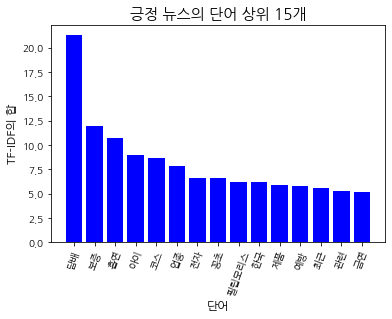

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import warnings
warnings.filterwarnings(action='ignore')

path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf' # 나눔 고딕
font_name = fm.FontProperties(fname=path, size=10).get_name() # 기본 폰트 사이즈 : 10
plt.rc('font', family=font_name)
fm._rebuild()

max = 15  #바 차트에 나타낼 단어의 수

plt.bar(range(max), [i[1] for i in POS_words[:max]], color="blue")
plt.title("긍정 뉴스의 단어 상위 %d개" %max, fontsize=15)
plt.xlabel("단어", fontsize=12)
plt.ylabel("TF-IDF의 합", fontsize=12)
plt.xticks(range(max), [i[0] for i in POS_words[:max]], rotation=70)

plt.show()

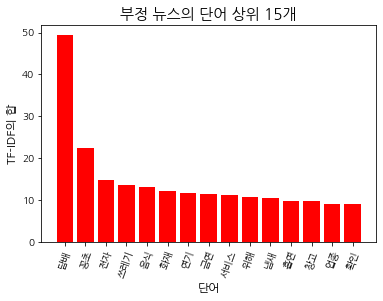

In [ ]:
plt.bar(range(max), [i[1] for i in NEG_words[:max]], color="red")
plt.title("부정 뉴스의 단어 상위 %d개" %max, fontsize=15)
plt.xlabel("단어", fontsize=12)
plt.ylabel("TF-IDF의 합", fontsize=12)
plt.xticks(range(max), [i[0] for i in NEG_words[:max]], rotation=70)

plt.show()